In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [56]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
!pip install pyarrow

     |████████████████████████████████| 29.4 MB 4.3 MB/s eta 0:00:01


In [6]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [7]:
df.shape

(1154112, 7)

In [12]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df['duration'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

In [17]:
df.duration.mean()

19.1672240937939

In [18]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [19]:
df.shape

(1109826, 8)

In [35]:
categorical = ['PUlocationID','DOlocationID']

In [21]:
df['PUlocationID'] = df['PUlocationID'].fillna(-1)
df['DOlocationID'] = df['DOlocationID'].fillna(-1)

In [29]:
(df['PUlocationID']==-1).mean()

0.8352732770722617

In [32]:
df[categorical] = df[categorical].astype(str)

In [38]:
dictionaries = df[categorical].to_dict(orient='records')

In [41]:
dv = DictVectorizer()
X_train = dv.fit_transform(dictionaries)

In [43]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [46]:
target='duration'
y_train = df[target].values

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_train)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

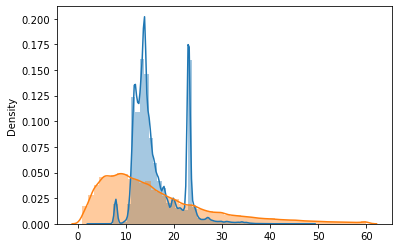

In [54]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='train')

In [57]:
mean_squared_error(y_train, y_pred, squared=False)

10.5285191072072

In [58]:
y_pred

array([23.05208486, 23.05208486, 14.10570259, ..., 16.61396091,
       11.13740006, 23.05208486])

In [70]:
df_test = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [71]:
df_test['duration'] = df_test.dropOff_datetime - df_test.pickup_datetime
df_test['duration'] = df_test['duration'].apply(lambda x: x.total_seconds() / 60)

In [72]:
df_test = df_test[(df_test.duration >= 1) & (df_test.duration <= 60)]

In [73]:
df_test['PUlocationID'] = df_test['PUlocationID'].fillna(-1)
df_test['DOlocationID'] = df_test['DOlocationID'].fillna(-1)

In [74]:
df_test[categorical] = df_test[categorical].astype(str)

In [75]:
dictionaries_test = df_test[categorical].to_dict(orient='records')

In [76]:
X_test = dv.transform(dictionaries_test)

In [77]:
y_test = df_test[target].values

In [79]:
y_pred = lr.predict(X_test)

In [80]:
mean_squared_error(y_test, y_pred, squared=False)

11.014283163400654